In [60]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [67]:
df = pd.read_csv("oracles2.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['date'])

In [68]:
display(df)

,Unnamed: 0,id,non_benign,engines,aiscore,date,Ad-Aware,ALYac,Arcabit,BitDefender,...,Cylance,Elastic,Palo Alto Networks,SecureAge APEX,SentinelOne (Static ML),Symantec Mobile Insight,TEHTRIS,Trapmine,Trustlook,Webroot
109,0,0338c630f656a69c13c6cffceef62fa20a654a2259d0b0...,11,55,76,2022-08-24 10:12:04,application.bitcoinminer.ahr,application.bitcoinminer.ahr,undetected,application.bitcoinminer.ahr,...,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type
169,0,bc89b278b866a040ad04ad4ca5ecc265970699c17c0779...,14,59,78,2022-08-24 10:12:05,application.bitcoinminer.ahr,application.bitcoinminer.ahr,application.bitcoinminer.ahr,application.bitcoinminer.ahr,...,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type
108,0,d49d9fb3595cf94dfa252250c5163177616bc9213aa42a...,14,59,78,2022-08-24 10:12:06,application.bitcoinminer.ahr,application.bitcoinminer.ahr,application.bitcoinminer.ahr,application.bitcoinminer.ahr,...,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type
69,0,78e0177f3afb9f50653ec12dd26d297f2aaf8ffee49b2a...,14,59,71,2022-08-24 10:12:06,application.bitcoinminer.ahr,application.bitcoinminer.ahr,application.bitcoinminer.ahr,application.bitcoinminer.ahr,...,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type
52,0,cae327efdd692ae89b7e00114a2dbcd1e426e35afedc5c...,14,59,75,2022-08-24 10:12:06,application.bitcoinminer.ahr,application.bitcoinminer.ahr,application.bitcoinminer.ahr,application.bitcoinminer.ahr,...,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,0,4f67d98abeea3145dab7a8b1f243baf6d992a143ddcc71...,2,59,0,2022-08-24 14:20:32,undetected,undetected,undetected,undetected,...,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type
19,0,9104fc3a1157b0ccdbaffe2c01b90a5e19a1733e155bff...,2,59,0,2022-08-24 14:20:32,undetected,undetected,undetected,undetected,...,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type
263,0,8d5d9a056052dd012b00e17906e057361674f4f8e6eeb2...,2,59,0,2022-08-24 14:20:33,undetected,undetected,undetected,undetected,...,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type,unable_to_process_file_type
257,0,c0d9924d70b8eba33457e76240652a1a193ae32a0f76af...,2

Text(0, 0.5, 'Number of detected')

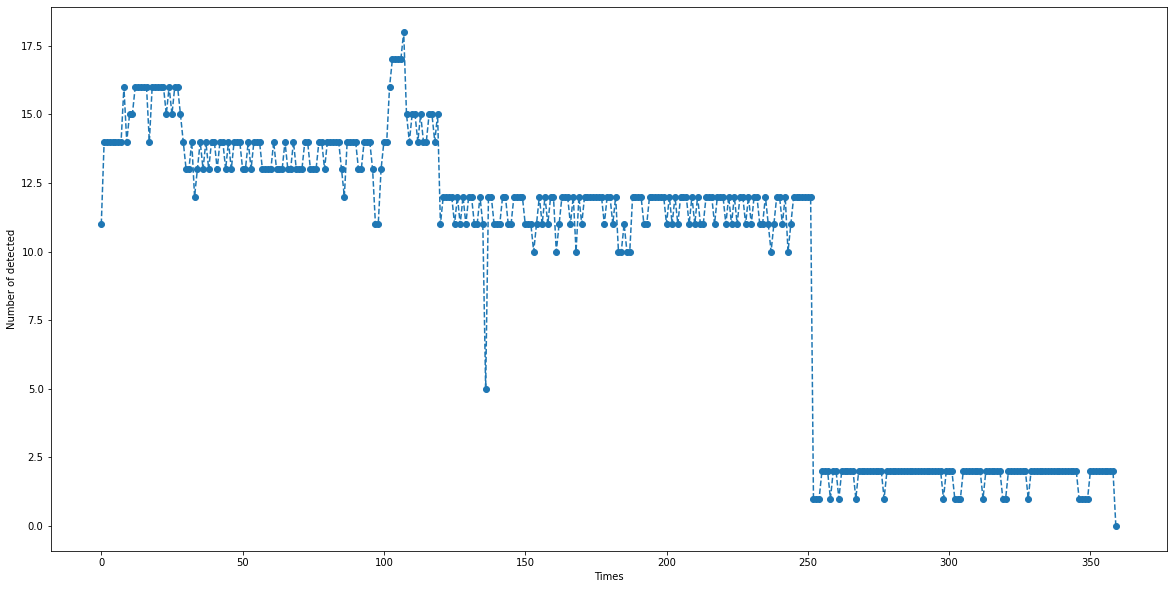

In [74]:
# Plot detection history
from scipy.signal import savgol_filter

x = range(len(df['date'].values))
#yhat = savgol_filter(x, 21, 2) # window size 51, polynomial order 3


plt.plot(
    x,
    df['non_benign'].values,
    'o--'
)

#plt.plot(
#    x,
#    yhat
#)
plt.xlabel("Times")
plt.ylabel("Number of detected")

['undetected', 'not-a-virus:risktool.wasm.miner.d']
['undetected', 'detected']
['undetected', 'pua.coinminer', 'pua.bitcoinminer', 'pua.wasm.coinminer']
['undetected', 'application.bitcoinminer.ahr']
['undetected', 'wasm/cryptonight', 'timeout']
['undetected', 'wasm/cryptonight']
['undetected', 'not-a-virus:risktool.wasm.miner.d']
['undetected', 'application.bitcoinminer.ahr_(b)']
['undetected', 'application.bitcoinminer.ahr']
['undetected', 'application.bitcoinminer.ahr']
['undetected', 'application.bitcoinminer.ahr']


([<matplotlib.axis.YTick at 0x14340bee0>,
 [Text(0, 1, 'Kaspersky'),
  Text(0, 2, 'Google'),
  Text(0, 3, 'Ikarus'),
  Text(0, 4, 'Arcabit'),
  Text(0, 5, 'McAfee-GW-Edition'),
  Text(0, 6, 'McAfee'),
  Text(0, 7, 'ZoneAlarm by Check Point'),
  Text(0, 8, 'Emsisoft'),
  Text(0, 9, 'BitDefender'),
  Text(0, 10, 'ALYac'),
  Text(0, 11, 'Ad-Aware')])

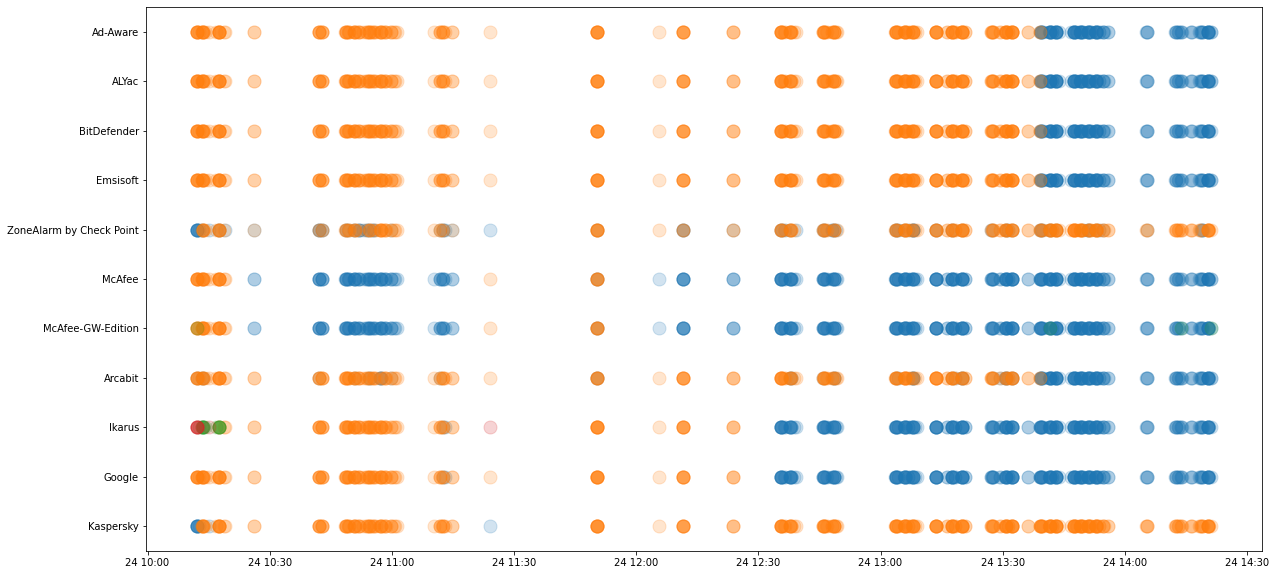

In [70]:
# Plot history by Oracle

oracles = [('Kaspersky', 
                ['undetected', 'not-a-virus:risktool.wasm.miner.d']), 
           ('Google', 
                ['undetected', 'detected']),
           ('Ikarus', 
                ['undetected', 'pua.coinminer', 'pua.bitcoinminer', 'pua.wasm.coinminer']),  
           ('Arcabit', 
               ['undetected', 'application.bitcoinminer.ahr']),
           ('McAfee-GW-Edition',
               ['undetected', 'wasm/cryptonight', 'timeout']
            ),
           ('McAfee',
               ['undetected', 'wasm/cryptonight']
            ),
           ('ZoneAlarm by Check Point', 
               ['undetected', 'not-a-virus:risktool.wasm.miner.d']
               
           ),
           ('Emsisoft', [
               'undetected', 'application.bitcoinminer.ahr_(b)'
           ]),
           ('BitDefender', 
               ['undetected', 'application.bitcoinminer.ahr']
           ),
           ('ALYac', [
               'undetected','application.bitcoinminer.ahr'
           ]),
           ('Ad-Aware', [
               'undetected','application.bitcoinminer.ahr'
           ])
          ]

#display(df['Kaspersky'])
for i, (oracle, tpes) in enumerate(oracles):
    # Get labels along the history
    labels = df[['date', oracle]]
    print(tpes)
    for j, tpe in enumerate(tpes):
        pts = labels[labels[oracle] == tpe]['date'].values
        plt.scatter(
            pts,
            [i + 1]*len(pts),
            color=f'C{j}',
            label=tpe,
            alpha=0.2,
            s=170,
            #marker='+'
        )
plt.yticks([x + 1 for x in range(len(oracles))], [o[0] for o in oracles])
#plt.legend()

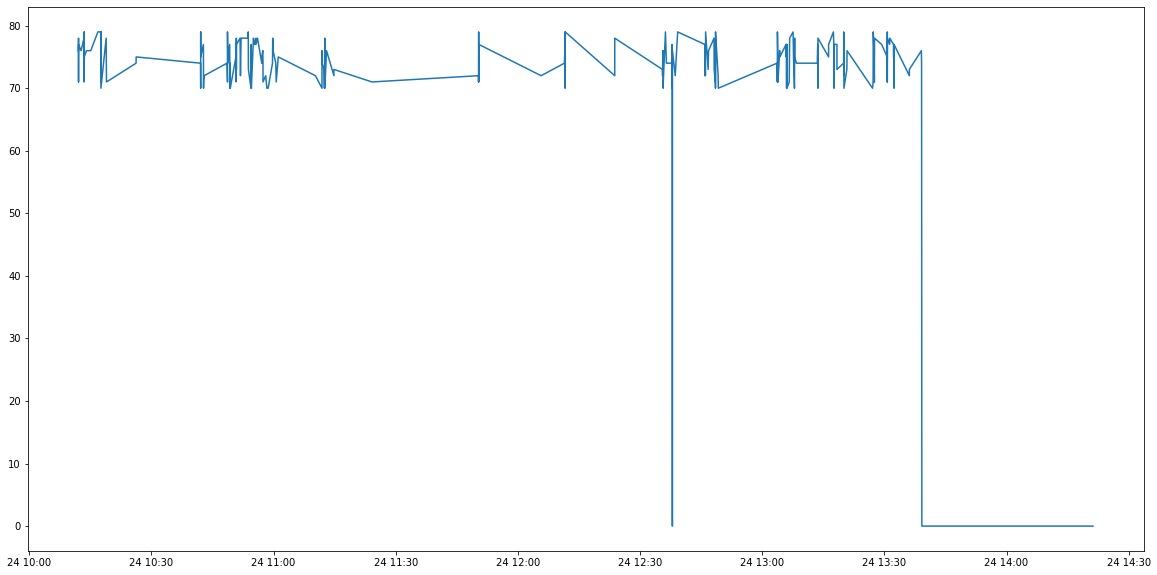

In [71]:
# Plot MAX AI score
plt.plot(
    df['date'].values,
    df['aiscore'].values
)

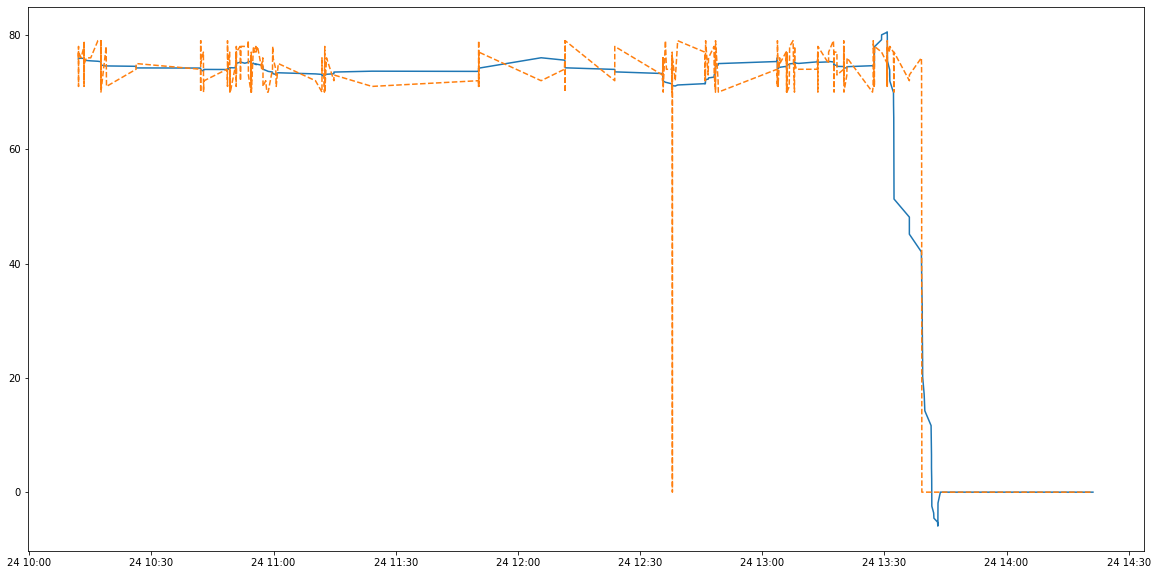

In [72]:
from scipy.signal import savgol_filter


result = savgol_filter(df['date'].values, 13, 5) # window size 13, polynomial order 5

x = df['date'].values
y = df['aiscore'].values

yhat = savgol_filter(y, 53, 3) # window size 51, polynomial order 3

plt.plot(x, yhat)
plt.plot(x, y, '--')